<center><h1> Análisis Discriminante Lineal </h1></center>

<div  align="right">Armando Olivares</div>

Are you able to beat the ﬁnancial markets?
* Objective: forecast the next-month direction (sign) of the S&P 500 indexm, Using ﬁnancial variables as predictors
* The data ﬁle is here http://www.hec.unil.ch/agoyal/docs/PredictorData2016.xlsx
* Rules: you need to forecast the sign returns at time t +1 with a classiﬁcation model using data up to time t (that includes predictors and the target at time t also)

In [821]:
#Paquetes
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [822]:
data = pd.read_csv('data.csv', dtype={'yyyymm': int, "Index": np.float64}, header=0)
data.head()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [823]:
print(data.shape)

(1752, 18)


Datos:

- **filas:** 1753
- **Columnas:** 18

Estadisticos Basicos Nuestro Dataset:

In [824]:
data.dtypes

yyyymm          int32
Index         float64
D12           float64
E12           float64
b/m           float64
tbl           float64
AAA           float64
BAA           float64
lty           float64
ntis          float64
Rfree         float64
infl          float64
ltr           float64
corpr         float64
svar          float64
csp           float64
CRSP_SPvw     float64
CRSP_SPvwx    float64
dtype: object

In [825]:
# display the last 5 rows
data.describe()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
count,1752.000000,1752.000000,1752.000000,1752.000000,1150.000000,1163.000000,1176.000000,1176.000000,1176.000000,1081.000000,1752.000000,1247.000000,1092.000000,1092.000000,1583.000000,788.000000,1092.000000,1092.000000
mean,194356.500000,238.236159,5.275114,12.185232,0.568575,0.034578,0.057887,0.069772,0.050921,0.017556,0.003054,0.002594,0.004784,0.005098,0.002515,0.000364,0.009350,0.006139
std,4215.762817,469.557218,8.857984,22.702072,0.258099,0.030059,0.026854,0.028415,0.026901,0.025606,0.002158,0.006554,0.024354,0.021633,0.004928,0.002375,0.054487,0.054557
min,187101.000000,2.730000,0.180000,0.160000,0.120510,0.000100,0.024600,0.029400,0.017500,-0.057677,0.000008,-0.031579,-0.112400,-0.094900,0.000000,-0.004166,-0.287461,-0.291524
25%,190706.750000,7.680000,0.406700,0.537475,0.354544,0.008400,0.037700,0.048700,0.029375,0.006350,0.001574,0.000000,-0.006900,-0.003900,0.000729,-0.001594,-0.016896,-0.019285
50%,194356.500000,16.000000,0.808350,1.285000,0.540124,0.031400,0.050750,0.064000,0.042850,0.017208,0.002976,0.002410,0.003200,0.004000,0.001237,-0.000284,0.012816,0.008977
75%,198006.250000,113.785000,5.950825,12.856700,0.738713,0.051400,0.074325,0.084200,0.066375,0.027527,0.004059,0.005525,0.015925,0.013425,0.002253,0.002296,0.038778,0.035741
max,201612.000000,2238.830000,45.700600,105.960000,2.028478,0.163000,0.154900,0.171800,0.148200,0.177040,0.013583,0.058824,0.152300,0.156000,0.070945,0.007688,0.414312,0.412291


Calculamos Algunas Variables adicionales como: dividend payout ratio, dividend-yield ratio, dividend-price ratio, earnings-price ratio, Inflation (lagged), 
    

In [826]:

data['dp'] = np.log(data['D12']) - np.log(data['Index'])
data['dy'] = np.log(data['D12']) - np.log(data['Index'].shift(1))
data['ep'] = np.log(data['E12']) - np.log(data['Index'])
data['de'] = np.log(data['D12']) - np.log(data['E12'])
data['Rfree'] = data['Rfree'].shift(1)

In [827]:


data['log_equity_premium'] = (np.log1p(data['CRSP_SPvw']) - np.log1p(data['Rfree'])) 

### Filtramos los datos desde 1940

In [828]:
data.yyyymm = pd.to_datetime((data.yyyymm), format='%Y%m')
data.head()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,...,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,dp,dy,ep,de,log_equity_premium
0,1871-01-01,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.837728,NaN,-2.406945,-0.430783,NaN
1,1871-02-01,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.851151,-2.837728,-2.420368,-0.430783,NaN
2,1871-03-01,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.875302,-2.851151,-2.444519,-0.430783,NaN
3,1871-04-01,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.903111,-2.875302,-2.472328,-0.430783,NaN
4,1871-05-01,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.928112,-2.903111,-2.497329,-0.430783,NaN


In [829]:
data2 = data.loc[data.yyyymm >="1940-01-01"]
data.head()

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,...,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,dp,dy,ep,de,log_equity_premium
0,1871-01-01,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.837728,NaN,-2.406945,-0.430783,NaN
1,1871-02-01,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.851151,-2.837728,-2.420368,-0.430783,NaN
2,1871-03-01,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.875302,-2.851151,-2.444519,-0.430783,NaN
3,1871-04-01,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.903111,-2.875302,-2.472328,-0.430783,NaN
4,1871-05-01,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.928112,-2.903111,-2.497329,-0.430783,NaN


In [830]:
data2.shape

(924, 23)

In [831]:
print(data2.isnull().any().sum(), ' / ', len(data2.columns))

print(data2.isnull().any(axis=1).sum(), ' / ', len(data2))

1  /  23
168  /  924


In [832]:
data2.isnull().any()

yyyymm                False
Index                 False
D12                   False
E12                   False
b/m                   False
tbl                   False
AAA                   False
BAA                   False
lty                   False
ntis                  False
Rfree                 False
infl                  False
ltr                   False
corpr                 False
svar                  False
csp                    True
CRSP_SPvw             False
CRSP_SPvwx            False
dp                    False
dy                    False
ep                    False
de                    False
log_equity_premium    False
dtype: bool

Existen 168 NA's en la columna *csp*, decidimos eliminar dicha columna

In [833]:
data2.drop(['csp'], axis=1, inplace=True)
data2.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(924, 22)

In [834]:
data2.dtypes

yyyymm                datetime64[ns]
Index                        float64
D12                          float64
E12                          float64
b/m                          float64
tbl                          float64
AAA                          float64
BAA                          float64
lty                          float64
ntis                         float64
Rfree                        float64
infl                         float64
ltr                          float64
corpr                        float64
svar                         float64
CRSP_SPvw                    float64
CRSP_SPvwx                   float64
dp                           float64
dy                           float64
ep                           float64
de                           float64
log_equity_premium           float64
dtype: object

In [835]:
data2.columns

Index(['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty',
       'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'CRSP_SPvw',
       'CRSP_SPvwx', 'dp', 'dy', 'ep', 'de', 'log_equity_premium'],
      dtype='object')

Creamos la Variable de Predecir

In [836]:
data2["sign"] = np.where(data2['log_equity_premium'].shift(-1) > data2['log_equity_premium'],0,1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [837]:
data2.sign.value_counts()

1    480
0    444
Name: sign, dtype: int64

In [838]:
data2.columns

Index(['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty',
       'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'CRSP_SPvw',
       'CRSP_SPvwx', 'dp', 'dy', 'ep', 'de', 'log_equity_premium', 'sign'],
      dtype='object')

In [839]:
from sklearn.cross_validation import train_test_split
X = data2[data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign'])]
X.shape
y =data2['sign']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [840]:
X_train =data2.loc[data2.yyyymm <"1975-01-01",data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign']) ]
X_train.tail()
y_train = data2.loc[data2.yyyymm <"1975-01-01",'sign']
y_train.tail()

1243    1
1244    0
1245    1
1246    0
1247    0
Name: sign, dtype: int32

In [869]:
X_test=data2.loc[data2.yyyymm >="1975-01-01",data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign']) ]
X_test.tail()
y_test= data2.loc[data2.yyyymm >="1975-01-01",'sign']
y_test.tail()

1747    1
1748    1
1749    0
1750    1
1751    1
Name: sign, dtype: int32

In [842]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
xgb_model = xgb.XGBClassifier( random_state=30, n_jobs=-1)
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.01, 0.1, 0.5, 0.55], 
              'max_depth': [6, 10, 5],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8, 0.6],
              'colsample_bytree': [0.7, 0.5, 0.6],
              'n_estimators': [250, 700,1000], 
             }


clf = RandomizedSearchCV(xgb_model,
                   cv=5,  param_distributions=parameters,
                   scoring="accuracy")

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'objective': ['binary:logistic'], 'learning_rate': [0.05, 0.01, 0.1, 0.5, 0.55], 'max_depth': [6, 10, 5], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8, 0.6], 'colsample_bytree': [0.7, 0.5, 0.6], 'n_estimators': [250, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

Entrnamos y Hacemos la prediccion

In [843]:
classifier =clf.best_estimator_
classifier.fit(X_train, y_train)
#Mtest = np.matrix(data_test[data_test.columns.difference(['Class'])])
pred_test= classifier.predict(X_test)

In [844]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
#pred_test= np.where(y_test > 0,1,1)
print(classification_report(pred_test, y_test))
print(confusion_matrix(pred_test, y_test))
print(accuracy_score(pred_test, y_test))

             precision    recall  f1-score   support

          0       0.35      0.62      0.45       135
          1       0.81      0.57      0.67       369

avg / total       0.68      0.59      0.61       504

[[ 84  51]
 [157 212]]
0.587301587302


In [845]:
y_test.value_counts()

1    263
0    241
Name: sign, dtype: int64

In [846]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
ps = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr = LogisticRegression(random_state=30)
searchlr = RandomizedSearchCV(estimator=lr, param_distributions=ps, scoring="accuracy", cv=3)
searchlr.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=30, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [847]:
classifier =searchlr.best_estimator_
classifier.fit(X_train, y_train)
#Mtest = np.matrix(data_test[data_test.columns.difference(['Class'])])
pred_test= classifier.predict(X_test)
print(classification_report(pred_test, y_test))
print(confusion_matrix(pred_test, y_test))
print(accuracy_score(pred_test, y_test))

             precision    recall  f1-score   support

          0       0.85      0.52      0.65       389
          1       0.30      0.68      0.41       115

avg / total       0.72      0.56      0.59       504

[[204 185]
 [ 37  78]]
0.559523809524


In [848]:
from sklearn.svm import SVC
c= [1, 10, 0.001]
g=np.arange(1e-4,1e-1,0.0001)
g=g.tolist()
ps = {'kernel':['linear', 'rbf'], "C":c, "gamma":g}
svc = SVC(random_state=30, probability=True)
search = RandomizedSearchCV(estimator=svc, param_distributions=ps, scoring="accuracy", cv=3)
search.fit(X_train, y_train)
classifier =search.best_estimator_
classifier.fit(X_train, y_train)
#Mtest = np.matrix(data_test[data_test.columns.difference(['Class'])])
pred_test= classifier.predict(X_test)
print(classification_report(pred_test, y_test))
print(confusion_matrix(pred_test, y_test))
print(accuracy_score(pred_test, y_test))

             precision    recall  f1-score   support

          0       0.50      0.49      0.49       249
          1       0.51      0.53      0.52       255

avg / total       0.51      0.51      0.51       504

[[121 128]
 [120 135]]
0.507936507937


In [849]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
class_lr= searchlr.best_estimator_
class_xgb = clf.best_estimator_
class_svm = search.best_estimator_
class_voting = VotingClassifier(estimators=[('lr', class_lr), ('xgb', class_xgb),
                                    ('svc', class_svm)],
                        voting='soft', weights=[1.5,2.5, 3], n_jobs = -1)

In [850]:
class_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=30, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('xgb', XGBClas...ar',
  max_iter=-1, probability=True, random_state=30, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='soft',
         weights=[1.5, 2.5, 3])

In [851]:
pred_test= class_voting.predict_proba(X_test)
#print(classification_report(pred_test, y_test))
#print(confusion_matrix(pred_test, y_test))
#print(accuracy_score(pred_test, y_test))
pred_test

array([[ 0.43404229,  0.56595771],
       [ 0.4448228 ,  0.55517719],
       [ 0.55922671,  0.44077329],
       ..., 
       [ 0.70635369,  0.29364631],
       [ 0.72071394,  0.27928606],
       [ 0.69324265,  0.30675735]])

Prediccion con  out-of-sample 

In [852]:
X_test.head()

,AAA,BAA,D12,E12,Rfree,b/m,corpr,de,dp,dy,ep,infl,ltr,lty,ntis,svar,tbl
1248,0.0883,0.1081,3.6233,8.7433,0.005958,0.980830,0.0596,-0.880902,-3.056160,-2.940324,-2.175258,0.003854,0.0225,0.0796,0.008511,0.004017,0.0626
1249,0.0862,0.1065,3.6467,8.5967,0.005217,0.933902,0.0137,-0.857556,-3.107884,-3.049723,-2.250328,0.007678,0.0131,0.0788,0.011653,0.002179,0.0550
1250,0.0867,0.1048,3.6700,8.4500,0.004583,0.972466,-0.0247,-0.833975,-3.122977,-3.101515,-2.289002,0.003810,-0.0267,0.0824,0.020468,0.002403,0.0549
1251,0.0895,0.1058,3.6833,8.2867,0.004575,0.909489,-0.0052,-0.810843,-3.165541,-3.119359,-2.354699,0.003795,-0.0182,0.0852,0.022496,0.002314,0.0561
1252,0.0890,0.1069,3.6967,8.1233,0.004675,0.897524,0.0106,-0.787296,-3.205066,-3.161910,-2.417770,0.005671,0.0212,0.0836,0.022954,0.001807,0.0523


In [853]:
pred_list = []
for i, it in X_test.iterrows():
    #print(i)
    x_test= data2.loc[i,data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign'])]
    print(x_test.shape)
    X_train = data2.loc[:(i-1),data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign'])]
    print(X_train.shape)
    y_train = data2.loc[:(i-1),'sign']
    class_voting.fit(X_train, y_train)
    pred_list.append(class_voting.predict(pd.DataFrame([x_test], columns=x_test.index)))
    

    

(17,)
(420, 17)
(17,)
(421, 17)
(17,)
(422, 17)
(17,)
(423, 17)
(17,)
(424, 17)
(17,)
(425, 17)
(17,)
(426, 17)
(17,)
(427, 17)
(17,)
(428, 17)
(17,)
(429, 17)
(17,)
(430, 17)
(17,)
(431, 17)
(17,)
(432, 17)
(17,)
(433, 17)
(17,)
(434, 17)
(17,)
(435, 17)
(17,)
(436, 17)
(17,)
(437, 17)
(17,)
(438, 17)
(17,)
(439, 17)
(17,)
(440, 17)
(17,)
(441, 17)
(17,)
(442, 17)
(17,)
(443, 17)
(17,)
(444, 17)
(17,)
(445, 17)
(17,)
(446, 17)
(17,)
(447, 17)
(17,)
(448, 17)
(17,)
(449, 17)
(17,)
(450, 17)
(17,)
(451, 17)
(17,)
(452, 17)
(17,)
(453, 17)
(17,)
(454, 17)
(17,)
(455, 17)
(17,)
(456, 17)
(17,)
(457, 17)
(17,)
(458, 17)
(17,)
(459, 17)
(17,)
(460, 17)
(17,)
(461, 17)
(17,)
(462, 17)
(17,)
(463, 17)
(17,)
(464, 17)
(17,)
(465, 17)
(17,)
(466, 17)
(17,)
(467, 17)
(17,)
(468, 17)
(17,)
(469, 17)
(17,)
(470, 17)
(17,)
(471, 17)
(17,)
(472, 17)
(17,)
(473, 17)
(17,)
(474, 17)
(17,)
(475, 17)
(17,)
(476, 17)
(17,)
(477, 17)
(17,)
(478, 17)
(17,)
(479, 17)
(17,)
(480, 17)
(17,)
(481, 17)
(17,)
(4

In [871]:
#sum(y_test ==pred_listist)

#len(pred_list)
(y_test.tolist())
predicctions = [l.tolist()[0] for l in pred_list]

In [872]:
#pd.Series.to_frame(x_test).Transpose()
#x_test.reset_index().set_index('index').T
#pred_list[1]
#[l.tolist()[0] for l in pred_list]
#(y_test.tolist()==predicctions)
len(predicctions)

24

In [870]:
predicctions
predicctions_naive = np.where(y_test== 0,1,1)
predicctions_naive_d = np.where(y_test== 1,0,0)
print(accuracy_score(predicctions, y_test.tolist()))
print(accuracy_score(predicctions_naive, y_test.tolist()))
print(accuracy_score(predicctions_naive_d, y_test.tolist()))

0.71626984127
0.521825396825
0.478174603175


Nuestro modelo presenta una precision del 71% en el oos

Two extra points: if your accuracy is good enough, develop a successful investment strategy • buy the index at t if Prob(sign(rt+1) = 1) > 0.5 + ε and sell it if Prob(sign(rt+1) = 1) < 0.5−ε • compare its returns with those obtained just by holding the Index (over a testing set) • you should optimize the hyper-parameter ε to maximize out-of-sample (testing set) performance

Para ello debemos 

In [857]:
X_train =data2.loc[data2.yyyymm <"2015-01-01",data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign']) ]
X_train.tail()
y_train = data2.loc[data2.yyyymm <"2015-01-01",'sign']
y_train.tail()
X_test=data2.loc[data2.yyyymm >="2015-01-01",data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign']) ]
X_test.tail()
y_test= data2.loc[data2.yyyymm >="2015-01-01",'sign']
y_test.tail()

1747    1
1748    1
1749    0
1750    1
1751    1
Name: sign, dtype: int32

In [858]:
# Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns

# Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100

# Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

# plt.ylabel("Strategy Returns (%)")

# plt.show()
pred_matrix = []
pred_list= []
for i, it in X_test.iterrows():
    #print(i)
    x_test= data2.loc[i,data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign'])]
    print(x_test.shape)
    X_train = data2.loc[:(i-1),data2.columns.difference(['yyyymm', 'Index', 'CRSP_SPvw', 'CRSP_SPvwx', 'log_equity_premium', 'sign'])]
    print(X_train.shape)
    y_train = data2.loc[:(i-1),'sign']
    class_voting.fit(X_train, y_train)
    pred_list.append(class_voting.predict_proba(pd.DataFrame([x_test], columns=x_test.index)))
    #pred_matrix.append(pred_list)
    

    
# etta = [0.01, 0.001, 0.05,0.1,0]

# for e in etta:
#     pred_list = []

(17,)
(900, 17)
(17,)
(901, 17)
(17,)
(902, 17)
(17,)
(903, 17)
(17,)
(904, 17)
(17,)
(905, 17)
(17,)
(906, 17)
(17,)
(907, 17)
(17,)
(908, 17)
(17,)
(909, 17)
(17,)
(910, 17)
(17,)
(911, 17)
(17,)
(912, 17)
(17,)
(913, 17)
(17,)
(914, 17)
(17,)
(915, 17)
(17,)
(916, 17)
(17,)
(917, 17)
(17,)
(918, 17)
(17,)
(919, 17)
(17,)
(920, 17)
(17,)
(921, 17)
(17,)
(922, 17)
(17,)
(923, 17)


In [859]:
# check the shape of the DataFrame (rows, columns)

In [860]:
def proba(f,e):
    if f <(0.5-e):
        return -1
    else:
        return 1


sell_buy_prob = [l.tolist()[0][1] for l in pred_list]
# sell_buy_prob
etta = [0.08, 0.05,0.1,0.3,0]
# e = 0.01
# [proba(x,e) for x in sell_buy_prob]
pred_matrix = []
for e in etta:
    pred_matrix.append([proba(x,e) for x in sell_buy_prob])

In [861]:
len(pred_matrix)

5

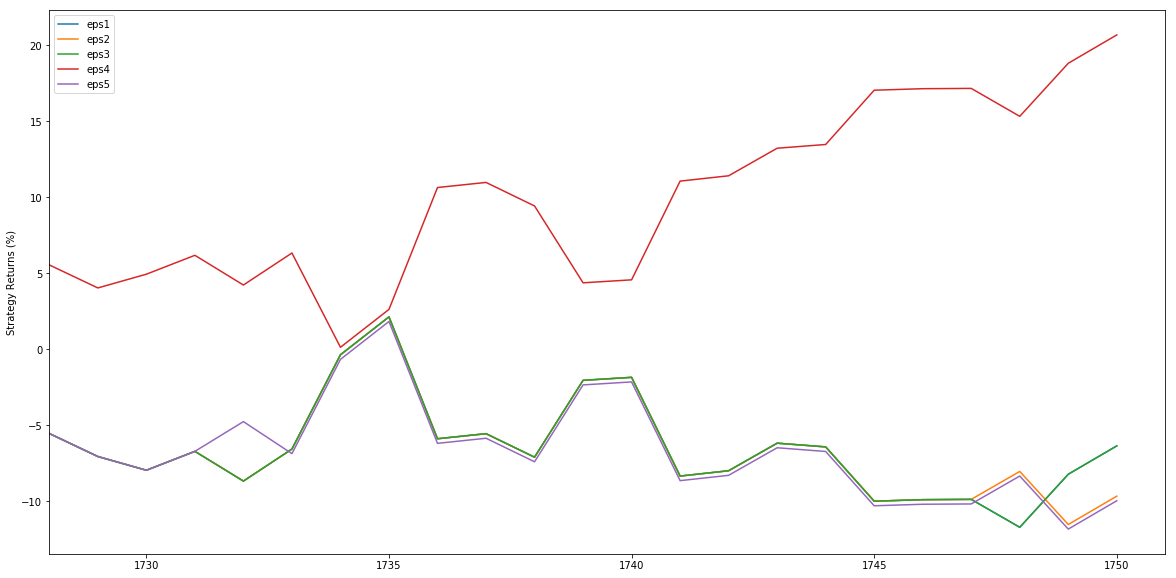

In [862]:
eq = (data2.loc[data2.yyyymm >="2015-01-01",'log_equity_premium'])
j = 0
for el in pred_matrix:
    j +=1
    returno =((eq.shift(-1))*100)

    sr = returno*el

    sr.cumsum().plot(figsize=(20,10))

    plt.ylabel("Strategy Returns (%)")
plt.legend(
           ["eps1",
            "eps2", "eps3", "eps4", "eps5", "eps6"],
           loc="upper left")
plt.show()
# Plot cosine with a blue continuous line of width 1 (pixels)
#plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
#plt.p#lot(X, S, color="green", linewidth=1.0, linestyle="-")

### En resumen:


 * En esta práctica se analizaron datos del mercado financiero el cual es complejo, los datos son retadores, es un sistema no lineal lo que lo hace muy difícil de predecir, sin embargo se ha demostrado que se puede lograr una aproximación aceptable (alrededor del 72%)  utlizando clasificadores basando en emsembles que nos permitio predecir el movimiento o tendencia del mercado y poder reducir el riesgo inherente cuando se desead invertir en el mercado de valore
 * Es importante destacar que la métrica y la calidad de nuestro modelo será tan bueno como los datos que se hayan utilizado para construirlo, esto quiere decir que lo más importante en un proceso de construcción de un modelo predictivo es: el conocimiento de los datos y el tratamiento que podamos darle para mejorarlos.


## Referencias

- [A simple deep learning model for stock price prediction using TensorFlow](https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877) 
- [Machine Learning Stock Prediction](https://www.quantinsti.com/blog/machine-learning-classification-strategy-python/?utm_medium=answer_is&utm_source=quora/) 